<a href="https://colab.research.google.com/github/Gokulnaath07/MachineLearning/blob/main/Assignment1ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Linear Regression with nne Variables: (15 points)  
a. Implement linear regression to predict tumor_size (Tumor Size) using “mean_texture”
feature from dataset. “tumor_size” will be the target variable.  
b. Evaluate performance using metrics (such as Mean Squared Error (MSE), R-squared (R²),
and Adjusted R-squared (Adjusted R²). You may also use graphs for explaining your
observations.

In [2]:
#read the data

data=pd.read_csv('Cancer_dataset.csv')
data.head(10)

,id,outcome,time,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,...,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,tumor_size,lymph_node_status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.10860,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.30010,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.12550,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.24140,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.19800,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0
5,843786,R,77,12.75,NaN,84.60,502.7,0.11890,0.1569,0.16640,...,107.30,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790,2.5,0.0
6,844359,N,60,18.98,19.61,124.40,1112.0,0.09087,0.1237,0.12130,...,152.60,1593.0,0.1144,0.3371,0.2990,0.1922,0.2726,0.09581,1.5,NaN
7,844582,R,77,13.71,20.83,90.20,577.9,0.11890,0.1645,0.09366,...,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,4.0,10.0
8,844981,N,119,13.00,21.82,87.50,519.8,0.12730,0.1932,0.18590,...,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,2.0,1.0
9,845010,N,76,12.46,24.04,83.97,475.9,0.11860,0.2396,0.22730,...,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,6.0,20.0


In [3]:
#as per question 1 mean_texture and tumor size are selected
x_train=data[['mean_texture']]
y_train=data[['tumor_size']]

In [4]:
#Printing the variable and target
print(x_train)
print(y_train)

     mean_texture
0           27.60
1           10.38
2           17.44
3           20.38
4           14.34
..            ...
193         21.92
194         31.18
195         29.19
196         22.84
197         28.13

[198 rows x 1 columns]
     tumor_size
0           5.0
1           3.0
2           2.5
3           2.0
4           3.5
..          ...
193         6.0
194         1.5
195         3.7
196         3.0
197         3.5

[198 rows x 1 columns]


In [5]:
#convert the data into numpy array
x_train=np.array(x_train)
y_train=np.array(y_train)
sh_x=x_train.shape[0]

#Check both have same no of columns
print(f"x_train shape: {sh_x}")
print(f"y_train shape: {y_train.shape[0]}")

x_train shape: 198
y_train shape: 198


In [6]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [7]:
plt.style.use('seaborn-v0_8-dark')
plt.style.use('ggplot')

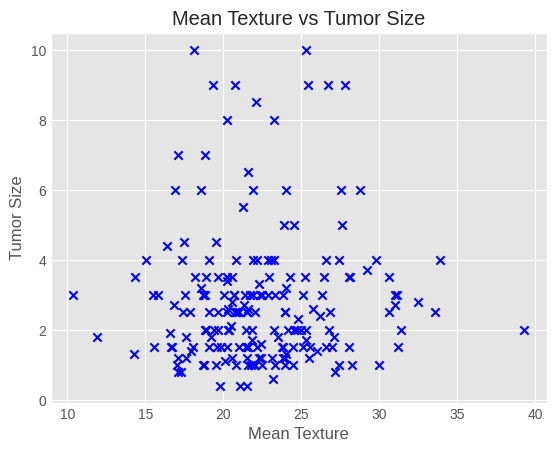

In [8]:
#To show how the values are scatted in the graph MEan texture vs tumor size
plt.scatter(x_train, y_train, marker='x', c='b')
plt.xlabel('Mean Texture')
plt.ylabel('Tumor Size')
plt.title('Mean Texture vs Tumor Size')
plt.show()

In [9]:
# Replace NaN values with 0
x_train = np.nan_to_num(x_train, nan=0.0)
y_train = np.nan_to_num(y_train, nan=0.0)



In [10]:
#now find w&b
"""use gradient descent and cost function to get the best w & b and calculate the prediction"""

w=0
b=0
learning_rate = 0.0001  # Try a smaller learning rate adjust it to get better result
tolerance = 10e-6  # Try a smaller tolerance value
m=x_train.shape[0] #to get the no of rows
previous_loss=float('inf') #infinity

for i in range(10000000): #we can change the iteration range here if the loop doesn't converge
  predicted_y=w*x_train+b #straight line for regression problems formula
  loss=(1/(2*m))*np.sum((predicted_y-y_train)**2) #costfunction
  if abs(previous_loss-loss)<tolerance: #if the loss is lesser than the tolerance it can be the global minima in the linear regression problem
    print(f"Converged at {i}th iteration")
    break

#updating the w and b till the above conditional statement satisfies
  dw=(1/m)*np.sum((predicted_y-y_train)*x_train)
  db=(1/m)*np.sum(predicted_y-y_train)

  w-=learning_rate*dw
  b-=learning_rate*db

#change the prevloss value by putting the found costfunction value in the previous loss
  previous_loss=loss

print(f"w={w}")
print(f"b={b}")

final_value=w*x_train+b #linear regression st line formula


Converged at 105th iteration
w=0.12330048862158406
b=0.006727973478908118


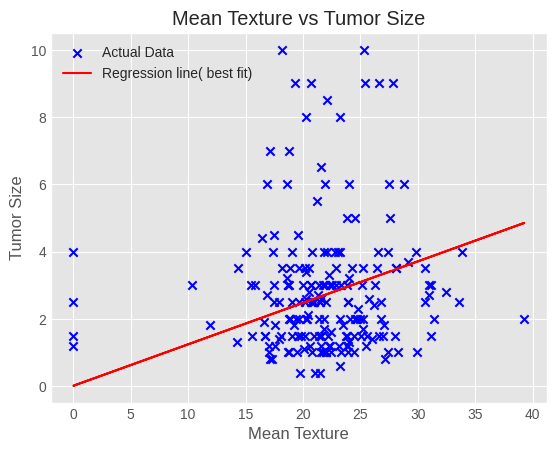

In [11]:
#plot the straight line found in the graph to see how well it fits the data
plt.scatter(x_train, y_train, marker='x',c='b', label='Actual Data')
plt.plot(x_train, final_value, c='r', label='Regression line( best fit)')
plt.xlabel('Mean Texture')
plt.ylabel('Tumor Size')
plt.title('Mean Texture vs Tumor Size')
plt.legend()
plt.show()

In [14]:
# Calculate Mean Squared Error (MSE) Loss
MSE_loss = (1 / (2 * m)) * np.sum((final_value - y_train) ** 2)
print(f"Mean Squared Error (MSE) Loss: {round(MSE_loss,4)}")
# Calculate Total Sum of Squares (TSS)
y_mean = np.mean(y_train)
print(f"MEan: {y_mean}")
print(f"y_train: {y_train[:5]}")
TSS = np.sum((y_train - y_mean) ** 2)

# Calculate Residual Sum of Squares (RSS)
RSS = np.sum((y_train - final_value) ** 2)

# Calculate R-squared (R²)
r_squared = 1 - (RSS / TSS)

print(f"R-squared: {round(r_squared,4)}")

#calculate adjusted R-Squared
n=x_train.shape[0]
p=1#there is only one predictor for linear regression
adjus_rSqu=1-(((1-r_squared)*(n-1))/(n-p-1))
print(f"Adjusted R-Squared: {round(adjus_rSqu,4)}")

Mean Squared Error (MSE) Loss: 2.0251
MEan: 2.847474747474747
y_train: [[5. ]
 [3. ]
 [2.5]
 [2. ]
 [3.5]]
R-squared: -0.0839
Adjusted R-Squared: -0.0894
